# **Week 2: G2M Insight for Cab Investment Firm**

Data Glacier Virtual Internship

Submitted By: Mahima Sadananda

Date: 09/10/2024

## **Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

## **Reading and Inspecting the Data**

In [3]:
# reading the datasets
cab  = pd.read_csv('/content/Cab_Data.csv')
city = pd.read_csv('/content/City.csv')
customer_ID = pd.read_csv('/content/Customer_ID.csv')
transaction_ID = pd.read_csv('/content/Transaction_ID.csv')

### **Cab**

In [4]:
# To view the top 5 rows
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
# To view the dataframe info
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


### **Customer_ID**

In [6]:
# To view the top 5 rows
customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
# To view the dataframe info
customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### **Transaction_ID**

In [ ]:
# To view the top 5 rows
transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
# To view the dataframe info
transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### **City**

In [8]:
# view top 5 rows
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
# To view the dataframe info
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


## **Data Preprocessing**

### **Creating Master Data**

We have 4 datasets which can be merged to create a master data, that will make it easier to conduct complete analysis. "transaction_ID" can be merged to "cab" with "Transaction ID" as the primary key, further "customer_ID" can be merged to this with "Customer ID" as the primary key. "City" data focuses more on the city's population and the user count - hence this can be kept aside for now and used separately later when required.

In [11]:
# create master data
master_data = (transaction_ID.merge(cab, how= 'inner')).merge(customer_ID, how='inner')
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536


In [12]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 32.9+ MB


### **Checking Null Values**

In [13]:
# checking null values
master_data.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Payment_Mode,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0
Gender,0


### **Checking Duplicate Values**

In [14]:
# checking duplicates values
master_data.duplicated().sum()

0

### **Check Irregularities in Features**

In [15]:
# Date of travel column was changed to the correct date format
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'], origin='1899-12-30', unit='D')

In [16]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536


In [17]:
city['Population'] = city['Population'].str.replace(',', '').astype(int)
city['Users'] = city['Users'].str.replace(',', '').astype(int)

In [18]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


## **Exploratory Data Analysis (EDA) + Feature Engineering**

In [19]:
# Payment Mode
master_data['Payment_Mode'].unique()

# there are 2 payment methods - cash, card

array(['Card', 'Cash'], dtype=object)

In [20]:
# Company
master_data['Company'].unique()

# there are 2 cab companies - Pink Cab, Yellow Cab

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [21]:
# Company
master_data['City'].unique()

# data is obtained from 20 US cities

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

### **Create New Features**

In [22]:
# profit
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

## **Hypothesis Analysis**



### **1. Seasonal Trends in Ride Demands**



**Hypothesis:** Ride demands will be higher in the weekends than weekdays due to increased social activities. Similarly, ride demands is likely to increase during weather conditions like cold and rainy months.

In [23]:
# creating new columns

#Day of travel
master_data['Day of Travel'] = master_data['Date of Travel'].dt.day_name()

#Month of travel
master_data['Month of Travel'] = master_data['Date of Travel'].dt.month_name()

#Weekday/Weekend
master_data['Weekday/Weekend of Travel'] = np.where(master_data['Day of Travel'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')

<ipython-input-24-a3e15411cbd8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = master_data.groupby(['Day of Travel', 'Company'])['Transaction ID'].count().reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


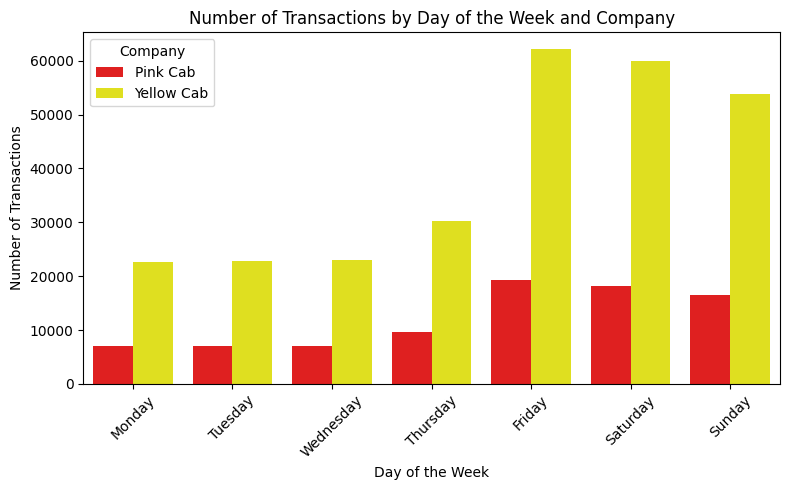

In [24]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Converting 'Day of Travel' to a categorical variable with the specified order
master_data['Day of Travel'] = pd.Categorical(master_data['Day of Travel'], categories=day_order, ordered=True)

# Grouping the data by 'day of the week' and company, count transactions
grouped_data = master_data.groupby(['Day of Travel', 'Company'])['Transaction ID'].count().reset_index()

# bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Day of Travel', y='Transaction ID', hue='Company', data=grouped_data, palette=['red', 'yellow'])
plt.title('Number of Transactions by Day of the Week and Company')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('1.png')
plt.show()

<ipython-input-199-016ac9f42ef9>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = master_data.groupby(['Month of Travel', 'Company'])['Transaction ID'].count().reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


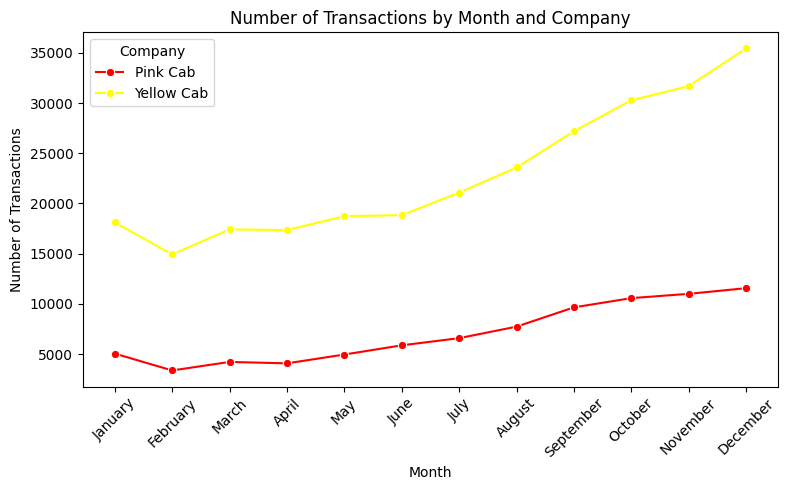

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Converting the 'Month of Travel' to a categorical variable with a specified order.
master_data['Month of Travel'] = pd.Categorical(master_data['Month of Travel'], categories=month_order, ordered=True)

# Grouping the data by month and company, count transactions, keeping order
grouped_data = master_data.groupby(['Month of Travel', 'Company'])['Transaction ID'].count().reset_index()

# line chart
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month of Travel', y='Transaction ID', hue='Company', data=grouped_data, palette=['red', 'yellow'], marker='o')
plt.title('Number of Transactions by Month and Company')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('1_line.png')
plt.show()

**Conclusion:** On a weekly basis, there is an increased cab demand on Fridays and weekends. On a monthtly basis, cab demand increases in the rainy and winter seasons. Overall, yellow cab is the preferred company. Hypothesis holds true based on the findings.

### **2. Ride Profit and City Population**

**Hypothesis:** Cab rides in bigger cities are likely to be priced higher leading to higher profit margins.

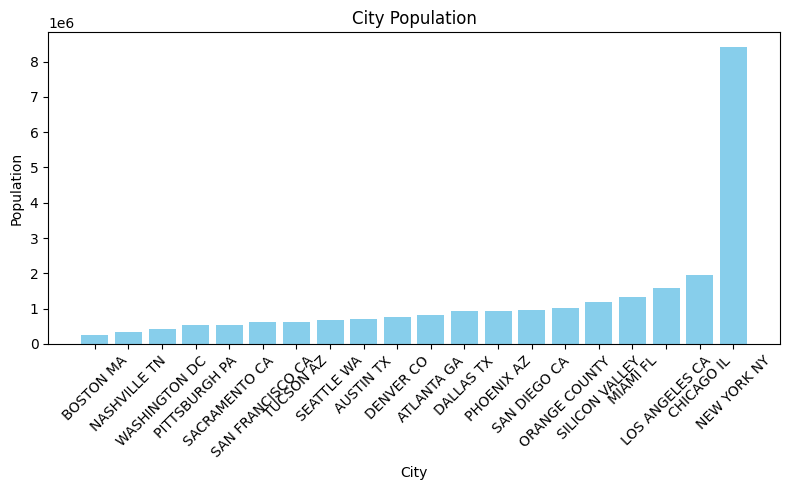

In [25]:
# Sorting the city data by population in descending order
city_desc = city.sort_values('Population')

# bar graph
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
plt.bar(city_desc['City'], city_desc['Population'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Population')
plt.title('City Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('2.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


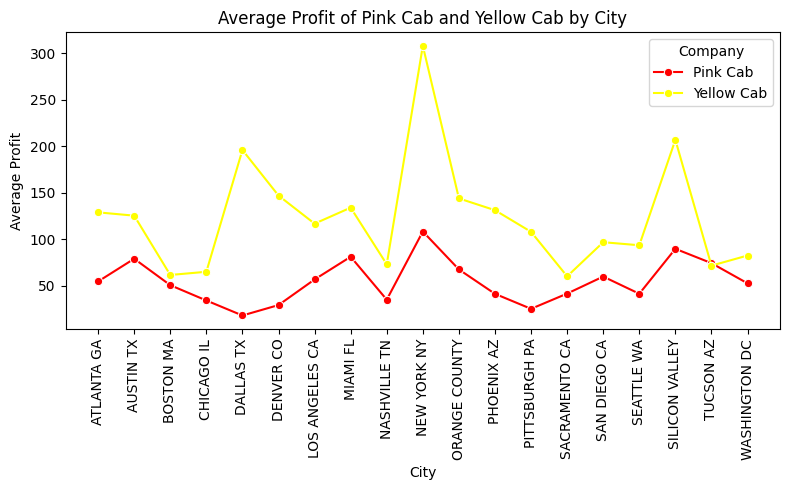

In [26]:
# First grouping the data by city and company,  calculate average profit
avg_profit = master_data.groupby(['City', 'Company'])['Profit'].mean().reset_index()

# line graph
plt.figure(figsize=(8, 5))
sns.lineplot(x='City', y='Profit', hue='Company', data=avg_profit, palette=['red', 'yellow'], marker='o')
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.title('Average Profit of Pink Cab and Yellow Cab by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Conclusion:** There are no evident trends in profits based on the size of the city. However, Yellow Cabs has been makking bigger profits in 19/20 cities, highest being in New York.


### **3. Average Spending and Payment Method**

**Hypothesis:** People tend to spend higher while using card for payment.

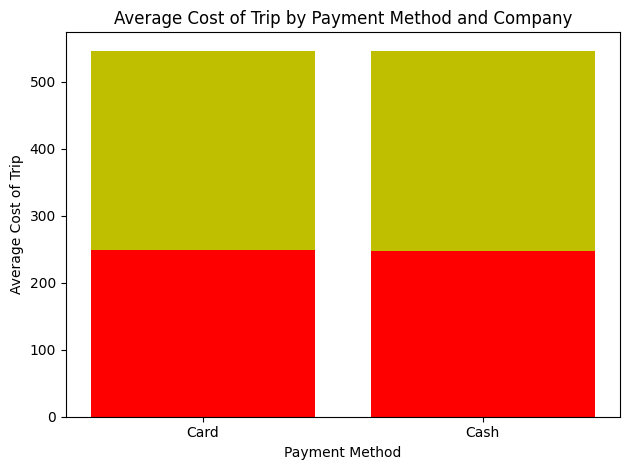

In [ ]:
# creating the data
average_cost_by_payment_method = master_data.groupby(['Payment_Mode', 'Company'])['Cost of Trip'].mean().reset_index()
y1 = average_cost_by_payment_method.loc[average_cost_by_payment_method['Company'] == 'Pink Cab', 'Cost of Trip'].values
y2 = average_cost_by_payment_method.loc[average_cost_by_payment_method['Company'] == 'Yellow Cab', 'Cost of Trip'].values
x = average_cost_by_payment_method['Payment_Mode'].unique()

# bar graph in stack
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='y')
plt.xlabel('Payment Method')
plt.ylabel('Average Cost of Trip')
plt.title('Average Cost of Trip by Payment Method and Company')
plt.tight_layout()
plt.show()

**Conclusion:** Both payment methods have the same average trip cost, and both the companies have approximately the same average trip cost across both payment methods. This indicates that rider's average spending does not change based on the payment method. However, Yellow Cab has overall higher average trip cost.


**4. Customer Retention**

**Hypothesis:** Based on above findings, yellow cabs is more likely to retain customers for repeated rides.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


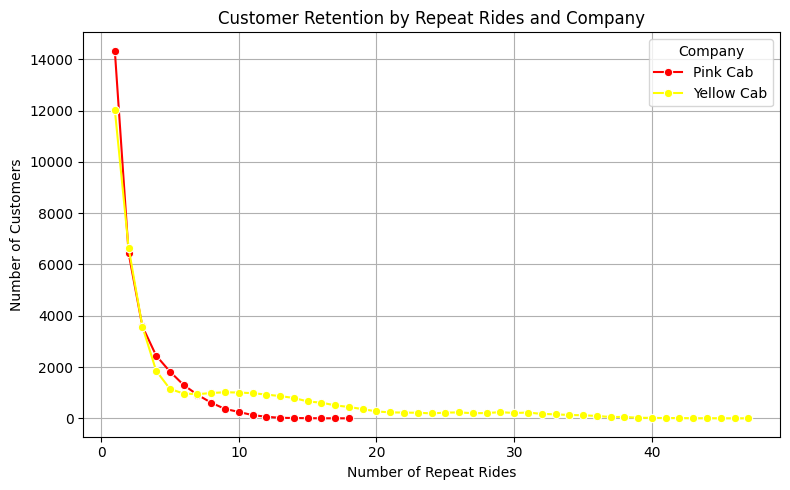

In [ ]:
# Calculating the repeated rides for each customer and company
repeat_rides = master_data.groupby(['Customer ID', 'Company'])['Transaction ID'].count().reset_index()
repeat_rides.rename(columns={'Transaction ID': 'Repeat Rides'}, inplace=True)

# first grouping the data by company and repeat rides, and then count customers
repeat_rides_grouped = repeat_rides.groupby(['Company', 'Repeat Rides'])['Customer ID'].count().reset_index()

# line chart
plt.figure(figsize=(8, 5))
sns.lineplot(x='Repeat Rides', y='Customer ID', hue='Company', data=repeat_rides_grouped, palette=['red', 'yellow'], marker='o')
plt.title('Customer Retention by Repeat Rides and Company')
plt.xlabel('Number of Repeat Rides')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.savefig('4.png')
plt.show()

**Conclusion:** Intrestingly, pink cab is the preferred choice as a first time user, and it continues to have higher repeat users upto 7 rides. However, yellow cab has total overall repeat users, with some users preferring it over 40 times. On the other hand, no user has used pink cabs over 18 times.

### **4. Customer Base**

**Hypothesis:** High income and middle aged users are more likely to cab the cabs.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


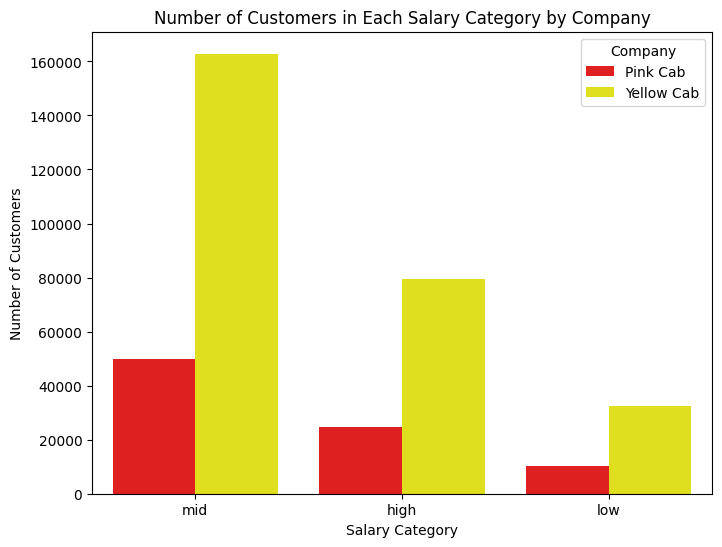

In [27]:
# bucketing salaries into 3 categories
bins = [0, 5000, 20000, float('inf')]
labels = ['low', 'mid', 'high']

master_data['Salary_Category'] = pd.cut(master_data['Income (USD/Month)'],
                                          bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.countplot(x='Salary_Category', hue='Company', data=master_data, palette=['red', 'yellow'], order=master_data['Salary_Category'].value_counts().index)
plt.title('Number of Customers in Each Salary Category by Company')
plt.xlabel('Salary Category')
plt.ylabel('Number of Customers')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


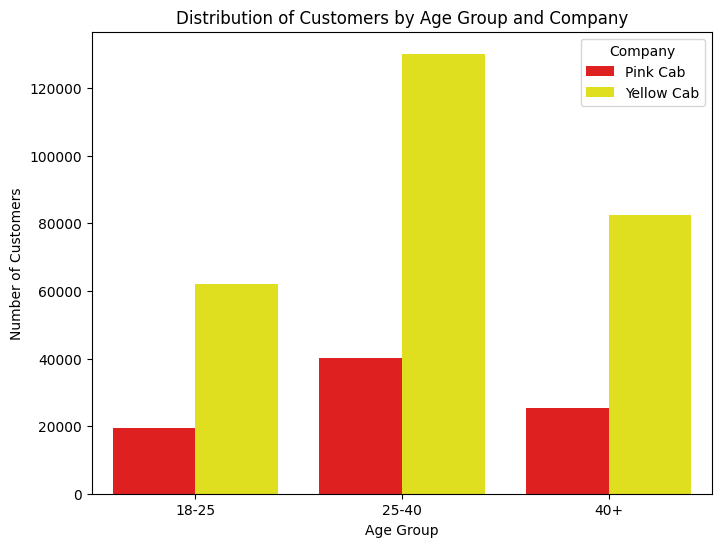

In [28]:
# grouping the age
age_bins = [18, 25, 40, float('inf')]
age_labels = ['18-25', '25-40', '40+']

# Creating a new column 'Age_Group' with the age categories
master_data['Age_Group'] = pd.cut(master_data['Age'], bins=age_bins, labels=age_labels, right=False)

# countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', data=master_data, order=age_labels,  palette=['red', 'yellow'],hue='Company')
plt.title('Distribution of Customers by Age Group and Company')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


**Conclusion:** Users are majorly from middle class and between 25-40 age group. High income users are likely to own a car, while youngsters and old age people are likely to use public transport.

### **5. Gender Distribution**

**Hypothesis:** Majority of the riders are male.

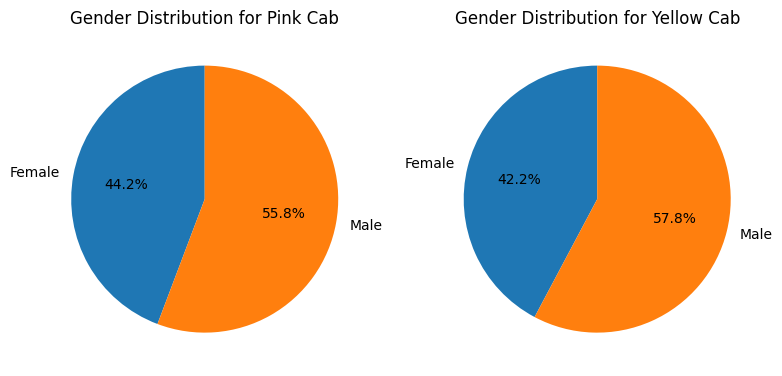

In [29]:
# Filtering the data for each company
pink_cab_data = master_data[master_data['Company'] == 'Pink Cab']
yellow_cab_data = master_data[master_data['Company'] == 'Yellow Cab']

# Calculating gender distribution for each company
pink_gender_distribution = pink_cab_data.groupby('Gender')['Customer ID'].count()
yellow_gender_distribution = yellow_cab_data.groupby('Gender')['Customer ID'].count()


fig, axes = plt.subplots(1, 2, figsize=(8, 5))

axes[0].pie(pink_gender_distribution.values, labels=pink_gender_distribution.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Gender Distribution for Pink Cab')

axes[1].pie(yellow_gender_distribution.values, labels=yellow_gender_distribution.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gender Distribution for Yellow Cab')

plt.tight_layout()
plt.show()

**Conclusion:** Over 50% of the riders are male and this distibution is consistent across both companies.

### **6. Demographic Distribution**

**Hypothesis:** Yellow Cabs is the preferred cab company in majority of the cities.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


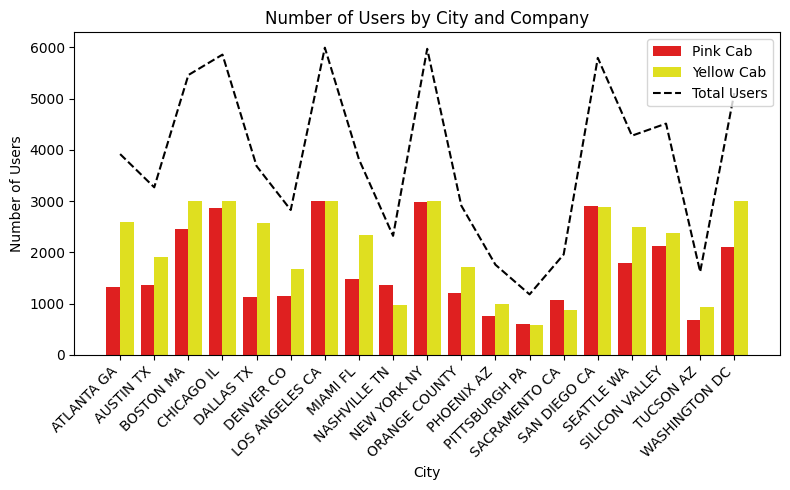

In [30]:

# first Grouping the data by city and company, and then counting users
city_company_users = master_data.groupby(['City', 'Company'])['Customer ID'].nunique().reset_index()

# Calculating total users for each city
total_users_by_city = city_company_users.groupby('City')['Customer ID'].sum().reset_index()

# bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x='City', y='Customer ID', hue='Company', data=city_company_users, palette=['red', 'yellow'])

plt.plot(total_users_by_city['City'], total_users_by_city['Customer ID'], linestyle='--', color='black', label='Total Users')

plt.xlabel('City')
plt.ylabel('Number of Users')
plt.title('Number of Users by City and Company')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Conclusion:** Yellow Cabs is the preferred company in 16/20 cities.

## **Recommendations:**

Based on the findings, **Yellow Cab** is the better choice for XYZ to invest in. Here’s why:

1. **Customer Preference:**
   - Yellow Cab is preferred in **16 out of 20 cities**. This means that in **80% of the cities**, more people choose Yellow Cab over the Pink Cab, showing a strong market presence.

2. **Profitability:**
   - Yellow Cab makes higher profits in **19 out of 20 cities**. This means that in **95% of the cities**, Yellow Cab earns more money. For example, in New York, where the cab market is huge, Yellow Cab is the most profitable.

3. **Higher Trip Cost:**
   - Although both companies have the same average trip cost for cash and card payments, Yellow Cab still has a **higher overall average trip cost**. This means customers tend to spend more on Yellow Cab rides, increasing their revenue.

4. **Customer Demographics:**
   - Most customers for both companies are middle-class people aged 25-40. Since Yellow Cab is already the preferred choice for a large portion of this group, investing in them will allow XYZ to tap into this steady customer base.

**Why Yellow Cab is the Best Option:**
- **80% of the cities** prefer Yellow Cab.
- It earns higher profits in **95% of the cities**.
- **Higher spending per trip**, leading to more revenue.

Hence Investing in Yellow Cab will give XYZ access to a company that is already doing well in most cities and is positioned to continue growing.